# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [15]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df.head(3)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


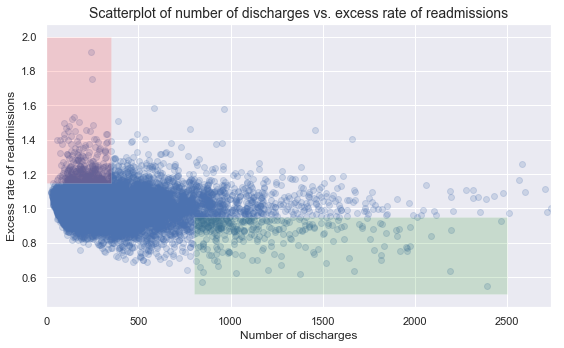

In [66]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

### A. Do you agree with the analysis above?<br>
<br>
Besides the fact that it seems unfair to penalize a facility based on a predicted/expected value rather than actual values, there are more concrete issues with the analysis. For one thing, all the conclusions are based solely on one scatter plot. There is no statistical support to prove if the claims are significant. Also, there is some inconsistency in describing small hospitals as those with less than 100 discharges, or those with less than 300 discharges. Finally, the red and green blocks seem arbitrarily defined.

### B. New analysis

Hypothesis test definitions:<br>
*Ho*: There is no difference in excess readmissions between smaller hospitals (100 discharges or less) and larger hospitals.<br>
*Ha*: Smaller hospitals tend to have higher rates of excess readmissions.

In [14]:
#Reshape date by removing unnecessary columns
df = clean_hospital_read_df
df = df[['Hospital Name', 'State', 'Number of Discharges', 'Excess Readmission Ratio',\
        'Predicted Readmission Rate', 'Expected Readmission Rate', 'Number of Readmissions']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 7 columns):
Hospital Name                 11578 non-null object
State                         11578 non-null object
Number of Discharges          11578 non-null int32
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
dtypes: float64(4), int32(1), object(2)
memory usage: 678.4+ KB


In [16]:
#There are still cols with null values; remove them
df_clean = df.dropna(axis=0)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 7 columns):
Hospital Name                 11497 non-null object
State                         11497 non-null object
Number of Discharges          11497 non-null int32
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
dtypes: float64(4), int32(1), object(2)
memory usage: 673.7+ KB


In [26]:
#Split into small and large categories
small = df_clean[df_clean['Number of Discharges'] <= 100]
large = df_clean[df_clean['Number of Discharges'] > 100]

#Find mean excess readmission ratio for small and large sets
obs_diff = np.mean(small['Excess Readmission Ratio']) - np.mean(large['Excess Readmission Ratio'])

#Get statistical moments and print out findings
l_desc = large['Excess Readmission Ratio'].describe()
s_desc = small['Excess Readmission Ratio'].describe()

print('Large Set', l_desc)
print('Small Set', s_desc)
print('The difference between the means is: {}'.format(obs_diff))

Large Set count    10274.000000
mean         1.005768
std          0.095046
min          0.549500
25%          0.947725
50%          1.000800
75%          1.059600
max          1.909500
Name: Excess Readmission Ratio, dtype: float64
Small Set count    1223.000000
mean        1.022088
std         0.058154
min         0.893500
25%         0.983800
50%         1.016700
75%         1.052750
max         1.495300
Name: Excess Readmission Ratio, dtype: float64
The difference between the means is: 0.016320732987291198


Perhaps somewhat surprising is that the means for both sets are above 1.0.
<br>
<br>
Now to explore visually:

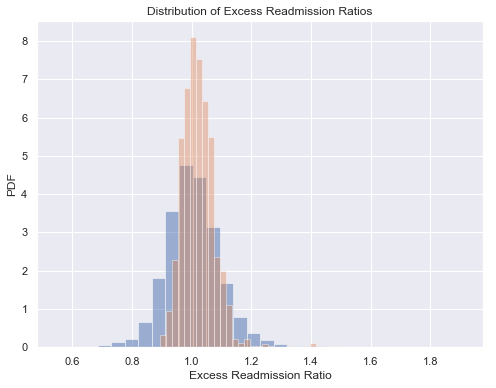

In [44]:
import seaborn as sns

sns.set()

#histograms
l_err = large['Excess Readmission Ratio']
s_err = small['Excess Readmission Ratio']

fig = plt.figure(figsize=(8, 6))
_ = plt.hist(l_err, bins=30, density=True, alpha=0.5)
_ = plt.hist(s_err, bins=30, density=True, alpha=0.4)
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('PDF')
_ = plt.title('Distribution of Excess Readmission Ratios')

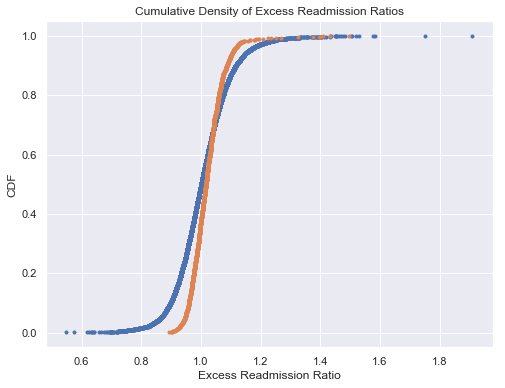

In [98]:
#ECDFs
def ecdf(data):
    '''returns x, y values for cdf'''
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x,y

#Get x and y values for large and small sets
x_l, y_l = ecdf(l_err)
x_s, y_s = ecdf(s_err)

#plot the densities
fig = plt.figure(figsize=(8,6))
_ = plt.plot(x_l, y_l, marker='.', linestyle='none')
_ = plt.plot(x_s, y_s, marker='.', linestyle='none')
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('CDF')
_ = plt.title('Cumulative Density of Excess Readmission Ratios')

The distributions approach normal, but have different shapes. Also, the smaller set is clearly more variable.

Now bootstrap several samples to test the significance of the observed results.

In [58]:
#Instatiate array of replicates
samp_diffs = np.empty(100000)

#compute the differences in means 100,000 times; append to array
for i in range(100000):
    combined = np.concatenate((l_err, s_err))
    perm = np.random.permutation(combined)
    s_split = perm[len(s_err):]
    l_split = perm[:len(s_err)]
    samp_diffs[i] = np.mean(s_split) - np.mean(l_split)

In [59]:
#calculate the p-value
p_val = np.sum(abs(samp_diffs) >= obs_diff) / len(samp_diffs)

print('The p-value is: ', p_val)

The p-value is:  0.0


The p-value is clearly very low, well below 0.01. Out of 100,000 trials, zero differences in means were as extreme as the one observed. All this suggests a rejection of the null hypothesis, and that there is significant difference between smaller and larger hospitals and the readmission rates. It appears the initial analysis was on to something, but now there is evidence to back up the claim.

However, this doesn't necessarily speak to the practical significance of the analysis. We don't have any information to explain the financial impact of the situation. The struggling hospitals in the test are small, so are they really costing the program that much releative to the overall sample. Perhaps more importantly, if funding is cut, how will that affect the community. These hospitals might be small because they serve isolated areas, so punishing them might not be worth the human cost.

##### Creating a new plot to better distinguish small and large:

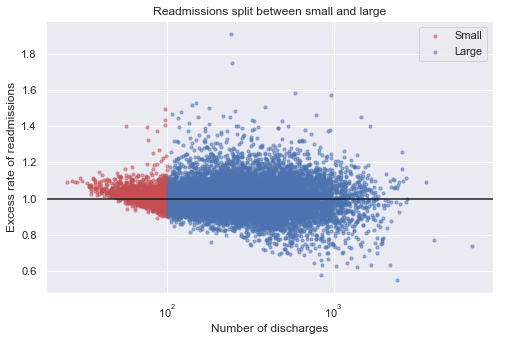

In [101]:
#Set up x, y values for both small and large sets
x_sm = [a for a in small['Number of Discharges']]
y_sm = list(small['Excess Readmission Ratio'])

x_lg = [a for a in large['Number of Discharges']]
y_lg = list(large['Excess Readmission Ratio'])

#Plot the two sets concurrently
fig = plt.figure(figsize=(8,5))
_ = plt.scatter(x_sm, y_sm, alpha=0.5, c='r', s=10, label='Small')
_ = plt.scatter(x_lg, y_lg, alpha=0.5, c='b', s=10, label='Large')
_ = plt.axhline(1.0, c='k')

_ = plt.xlabel('Number of discharges', fontsize=12)
_ = plt.ylabel('Excess rate of readmissions', fontsize=12)
_ = plt.xscale('log')
_ = plt.legend()
_ = plt.title('Readmissions split between small and large')

This plot better delineates between the two sets, and clearly shows the respective splits among readmission rates. Yes, smaller hospitals seem to have a higher frequency of high admissers, but there are many data points among the large group that exceed the ratio threshold of 1.0.